In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess: reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

# Compile model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.8807 - loss: 0.4116 - val_accuracy: 0.9798 - val_loss: 0.0737
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9788 - loss: 0.0723 - val_accuracy: 0.9847 - val_loss: 0.0569
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9872 - loss: 0.0448 - val_accuracy: 0.9865 - val_loss: 0.0491
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.9900 - loss: 0.0316 - val_accuracy: 0.9878 - val_loss: 0.0473
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9926 - loss: 0.0241 - val_accuracy: 0.9867 - val_loss: 0.0486
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9813 - loss: 0.0577
Test Accuracy: 0.9851


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


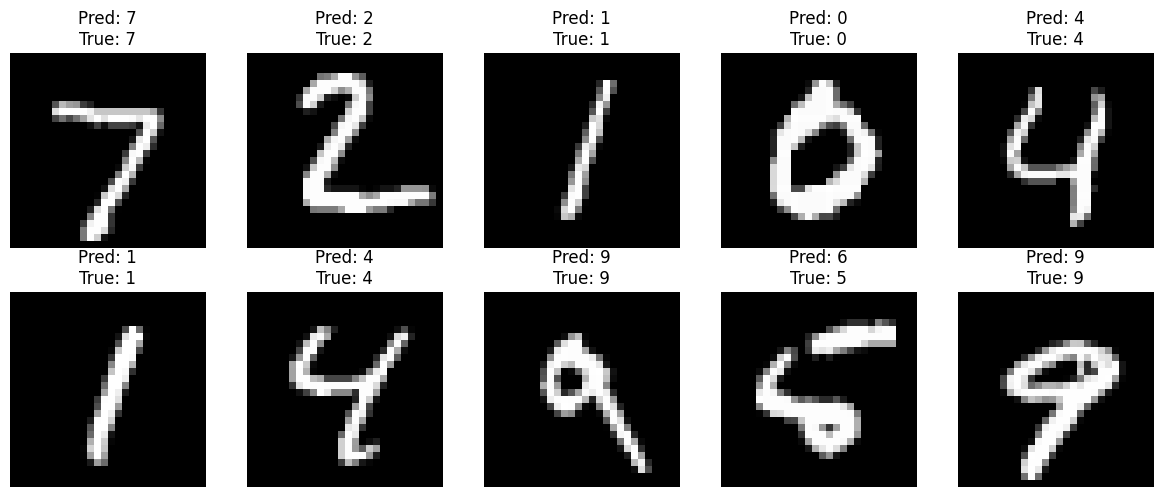

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on test images
predictions = model.predict(x_test)

# Plot the first 10 test images with predictions
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(y_test[i])}")
    plt.axis("off")

plt.tight_layout()
plt.show()
